In [ ]:
! pip3 install -r requirements.txt

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# Get Font 1 templates ready

In [ ]:
# Path to the folder containing your JPEG images
folder_path = 'digits/font_2/'

# Create lists to store original and processed images
original_images = []
processed_images = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        # Read the image in grayscale
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, 0)

        # Threshold the image to create a binary mask
        _, thresh = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Get the height and width of the image
        height, width = image.shape[:2]

        # Create a mask to fill border-connected regions
        mask = np.zeros((height + 2, width + 2), dtype=np.uint8)

        # Iterate through each contour
        for contour in contours:
            # Get bounding box coordinates
            x, y, w, h = cv2.boundingRect(contour)

            # If contour touches the border of the image, fill it with white in the mask
            if x == 0 or y == 0 or x + w == width or y + h == height:
                cv2.drawContours(mask, [contour], 0, 255, -1)  # Fill contour in the mask

        # Crop the mask to match the size of the input image
        mask = mask[1:-1, 1:-1]

        # Apply the mask to the original image to turn border-connected pixels black
        result = image.copy()
        result[mask == 255] = 0  # Set pixels to black where mask is white

        # Append original and processed images to lists
        original_images.append(image)
        processed_images.append(result)


In [ ]:
# Function to make border pixels black
def make_border_black(image_array):
    height, width = image_array.shape
    image_array[0, :] = 0  # Top border
    image_array[height - 1, :] = 0  # Bottom border
    image_array[:, 0] = 0  # Left border
    image_array[:, width - 1] = 0  # Right border
    return image_array

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_images[0], cmap='gray')
plt.axis('off')



In [ ]:
# Show original vs processed images
num_images = len(original_images)

plt.figure(figsize=(14, 7 * num_images))
for i in range(num_images):
    plt.subplot(num_images, 2, i * 2 + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    plt.subplot(num_images, 2, i * 2 + 2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def find_and_draw_longest_lines(image):
    edges = cv2.Canny(image, 50, 300)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=40)

    longest_vertical_line = None
    longest_horizontal_line = None
    max_vertical_length = 0
    max_horizontal_length = 0
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
    
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
    
            line_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
            if np.abs(b) > 0.1:  # Vertical line
                if line_length > max_vertical_length:
                    max_vertical_length = line_length
                    longest_vertical_line = (x1, y1, x2, y2)
            else:  # Horizontal line
                if line_length > max_horizontal_length:
                    max_horizontal_length = line_length
                    longest_horizontal_line = (x1, y1, x2, y2)

    if longest_vertical_line is not None:
        x1, y1, x2, y2 = longest_vertical_line
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 0), 15)

    if longest_horizontal_line is not None:
        x1, y1, x2, y2 = longest_horizontal_line
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 0), 15)

    return image

In [ ]:
# Apply the function to make border pixels black
modified_image = make_border_black(np.copy(original_images[4]))  
modified_image= find_and_draw_longest_lines(modified_image)
"""# Display the modified image with black borders
plt.subplot(1, 2, 2)
plt.title('Image with Black Borders')
plt.imshow(modified_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()"""


plt.imshow(modified_image, cmap='gray')

In [ ]:
def remove_border_connected(image):
    # Read the image in grayscale
    #image = cv2.imread(image_path, 0)  # Replace with your image path

    # Threshold the image to create a binary mask
    _, thresh = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Create a mask to fill border-connected regions
    mask = np.zeros((height + 2, width + 2), dtype=np.uint8)

    # Iterate through each contour
    for contour in contours:
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
        
        # If contour touches the border of the image, fill it with white in the mask
        if x == 0 or y == 0 or x + w == width or y + h == height:
            cv2.drawContours(mask, [contour], 0, 255, -1)  # Fill contour in the mask

    # Crop the mask to match the size of the input image
    mask = mask[1:-1, 1:-1]

    # Apply the mask to the original image to turn border-connected pixels black
    result = image.copy()
    result[mask == 255] = 0  # Set pixels to black where mask is white

    return result

# Example usage:
image_path = 'phase1_digits/font_3/test_3/tile_1_2.jpg'  # Replace with your image path
processed_image = remove_border_connected(cv2.imread(image_path, 0))

# Display the original and processed images
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(cv2.imread(image_path, 0), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Read the grayscale image
#gray_image = cv2.imread('digits/6.jpg', 0)  # Replace 'path_to_your_grayscale_image.jpg' with the actual path
gray_image = cv2.imread('phase1_digits/font_2/test_11/tile_4_3.jpg', 0)  # Replace 'path_to_your_grayscale_image.jpg' with the actual path
gray_image = make_border_black(gray_image)  
gray_image = find_and_draw_longest_lines(gray_image)
inverted_gray_image = cv2.bitwise_not(gray_image)
_, inverted_binarized_image = cv2.threshold(inverted_gray_image, 120, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed
NUMBER = -1

 # SIFT

In [ ]:
# Create SIFT object
sift = cv2.SIFT_create()

# Store the number of good matches for each processed image
good_matches_count = []

keypoints_sample, descriptors_sample = sift.detectAndCompute(gray_image, None)

# Process each image in the 'processed_images' array
for processed_image in processed_images:

    # Find keypoints and descriptors for the processed image
    keypoints_processed, descriptors_processed = sift.detectAndCompute(processed_image, None)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors_sample, descriptors_processed, k=2)

    # Apply ratio test to find good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.4 * n.distance:
            good_matches.append(m)
    
    # Store the number of good matches for this processed image
    good_matches_count.append(len(good_matches))

    # Draw the matches
    result_image = cv2.drawMatches(gray_image, keypoints_sample, processed_image, keypoints_processed, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the images using matplotlib.pyplot
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Display the sample digit
    ax[0].imshow(gray_image, cmap='gray')
    ax[0].set_title('Sample Digit')
    ax[0].axis('off')

    # Display the processed image
    ax[1].imshow(processed_image, cmap='gray')
    ax[1].set_title('Processed Image')
    ax[1].axis('off')

    # Display the matches
    ax[2].imshow(result_image)
    ax[2].set_title(f'Matches - Good Matches: {len(good_matches)}')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

# Display the number of good matches for each processed image
print("Number of good matches for each processed image:")
for i, count in enumerate(good_matches_count):
    print(f"Processed Image {i+1}: {count}")


# ORB

In [ ]:
# Create ORB object
orb = cv2.ORB_create()

# Store the number of good matches for each processed image
good_matches_count_orb = []

# Find keypoints and descriptors for the sample image using ORB
keypoints_sample_orb, descriptors_sample_orb = orb.detectAndCompute(gray_image, None)

# Process each image in the 'processed_images' array
for original_image in processed_images:
    # Find keypoints and descriptors for the processed image using ORB
    keypoints_processed_orb, descriptors_processed_orb = orb.detectAndCompute(original_image, None)

    # Create a BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors using the BFMatcher
    matches = bf.match(descriptors_sample_orb, descriptors_processed_orb)

    # Sort matches based on distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Apply ratio test to find good matches
    good_matches_orb = []
    for m in matches:
        if m.distance < 30:  # Adjust this threshold as needed
            good_matches_orb.append(m)
    
    # Store the number of good matches for this processed image
    good_matches_count_orb.append(len(good_matches_orb))

    # Draw the matches
    result_image_orb = cv2.drawMatches(gray_image, keypoints_sample_orb, original_image, keypoints_processed_orb, good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the images using matplotlib.pyplot
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Display the sample digit
    ax[0].imshow(gray_image, cmap='gray')
    ax[0].set_title('Sample Digit')
    ax[0].axis('off')

    # Display the processed image
    ax[1].imshow(original_image, cmap='gray')
    ax[1].set_title('Processed Image')
    ax[1].axis('off')

    # Display the matches
    ax[2].imshow(result_image_orb)
    ax[2].set_title(f'Matches - Good Matches: {len(good_matches_orb)}')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

# Display the number of good matches for each processed image using ORB
print("Number of good matches for each processed image using ORB:")
for i, count in enumerate(good_matches_count_orb):
    print(f"Processed Image {i+1}: {count}")


In [ ]:
original_images

In [ ]:
def match_images_with_sift(sample_image, processed_images):
    sample_image = make_border_black(sample_image)
    sample_image = find_and_draw_longest_lines(sample_image)
    # Create SIFT object
    sift = cv2.SIFT_create()

    # Store the number of good matches for each processed image
    matches_per_image = []

    # Get keypoints and descriptors for the sample image
    keypoints_sample, descriptors_sample = sift.detectAndCompute(sample_image, None)

    # Process each image in the 'processed_images' array
    for original_image in processed_images:
        # Find keypoints and descriptors for the processed image
        keypoints_processed, descriptors_processed = sift.detectAndCompute(original_image, None)

        # Create a Brute Force Matcher
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(descriptors_sample, descriptors_processed, k=2)

        # Apply ratio test to find good matches
        good_matches = []
        for m, n in matches:
            if m.distance < 0.4 * n.distance:
                good_matches.append(m)

        # Store the good matches for this processed image
        matches_per_image.append(good_matches)

    return matches_per_image



In [ ]:
# Example usage:
# Assuming 'gray_image' is the sample image and 'original_images' contains the processed images
matches_array = match_images_with_sift(gray_image, processed_images)
matches_count_sift = [len(matches) for matches in matches_array]

# Display the number of good matches for each processed image
print("Number of good matches for each processed image:")
for i, matches in enumerate(matches_array):
    print(f"Processed Image {i+1}: {len(matches)}")


In [ ]:
matches_count_sift

In [ ]:
def match_images_with_orb(sample_image, processed_images):
    sample_image = make_border_black(sample_image)
    sample_image = find_and_draw_longest_lines(sample_image)
    # Create ORB object
    orb = cv2.ORB_create()

    # Store the number of good matches for each processed image
    good_matches_count = []

    # Find keypoints and descriptors for the sample image using ORB
    keypoints_sample, descriptors_sample = orb.detectAndCompute(sample_image, None)

    # Process each image in the 'processed_images' array
    for original_image in processed_images:
        # Find keypoints and descriptors for the processed image using ORB
        keypoints_processed, descriptors_processed = orb.detectAndCompute(original_image, None)

        # Create a BFMatcher object
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

        # Match descriptors using the BFMatcher
        matches = bf.match(descriptors_sample, descriptors_processed)

        # Sort matches based on distance
        matches = sorted(matches, key=lambda x: x.distance)

        # Apply ratio test to find good matches
        good_matches = [m for m in matches if m.distance < 40]  # Adjust this threshold as needed

        # Store the number of good matches for this processed image
        good_matches_count.append(len(good_matches))

        # Draw the matches
        result_image = cv2.drawMatches(sample_image, keypoints_sample, original_image, keypoints_processed, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return good_matches_count



In [ ]:
match_images_with_orb(gray_image, original_images)

In [ ]:
# Example usage:
# Assuming 'gray_image' is the sample image and 'original_images' contains the processed images
matches_count_orb = list(match_images_with_orb(gray_image, original_images))

# Display the number of good matches for each processed image
print("Number of good matches for each processed image using ORB:")
for i, count in enumerate(matches_count_orb):
    print(f"Processed Image {i+1}: {count}")

In [ ]:
matches_count_orb

In [ ]:
# Get indices of the greatest 4 elements in list_1
indices_sift = sorted(range(len(matches_count_sift)), key=lambda i: matches_count_sift[i], reverse=True)[:2]

# Find the index with the greatest element in list_2 among the selected indices from list_1
max_index = max(indices_sift, key=lambda i: matches_count_orb[i])

print(f"The indices of the greatest 4 elements in list_1 are: {indices_sift}")
print(f"Among these indices, index {max_index} has the greatest element {matches_count_orb[max_index]} in list_2.")

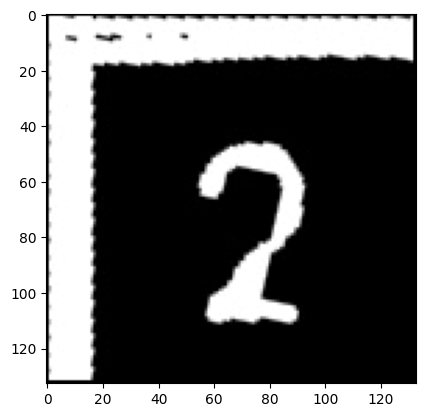

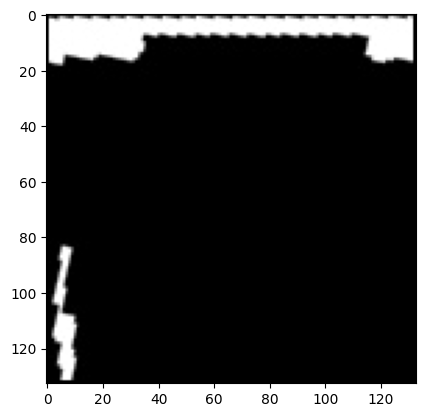

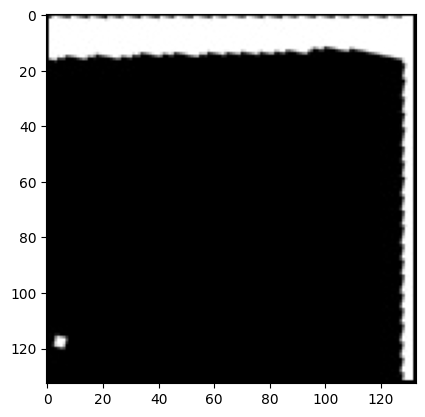

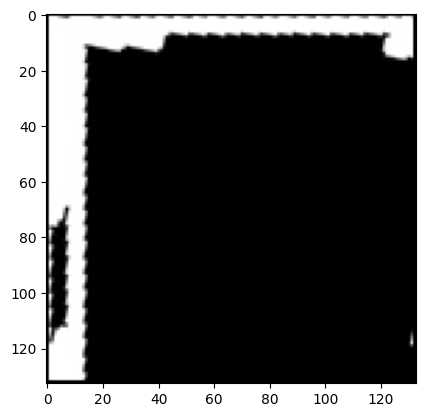

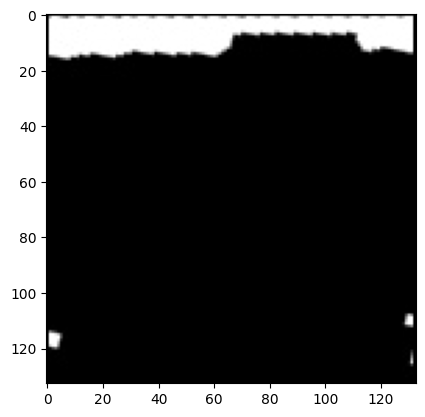

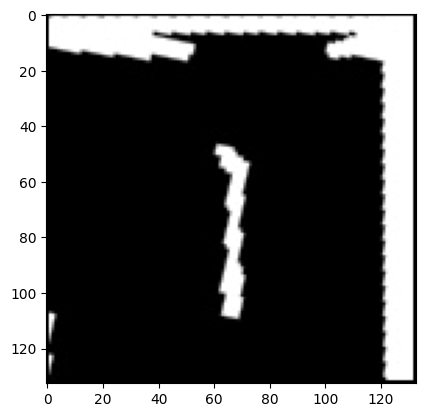

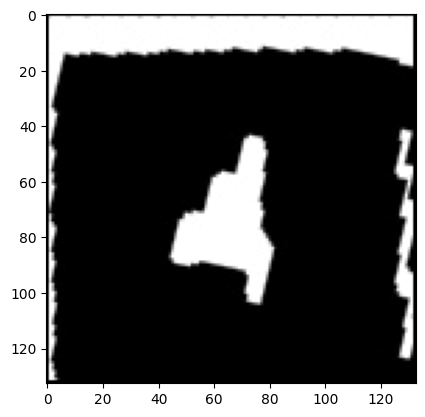

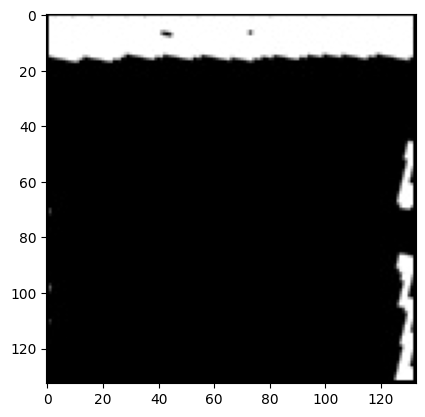

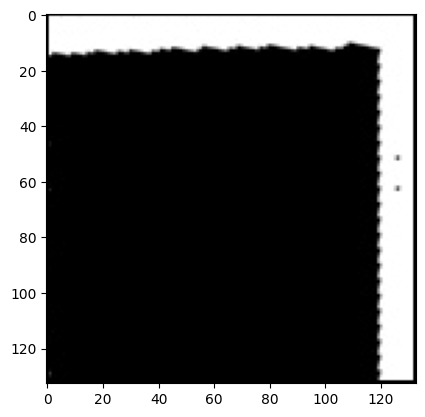

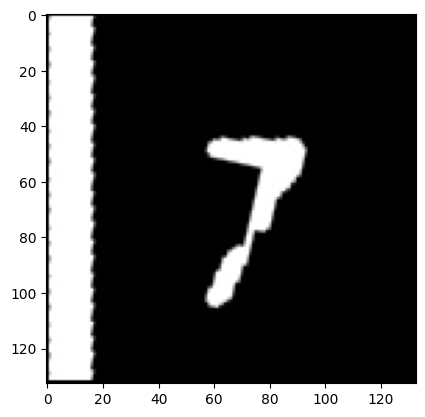

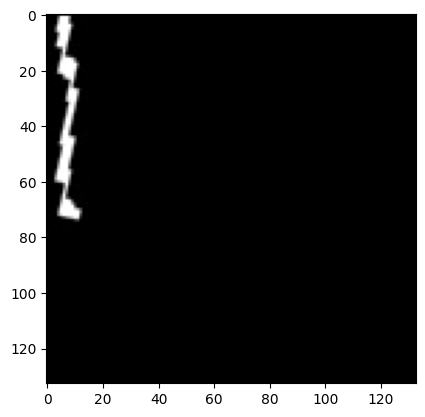

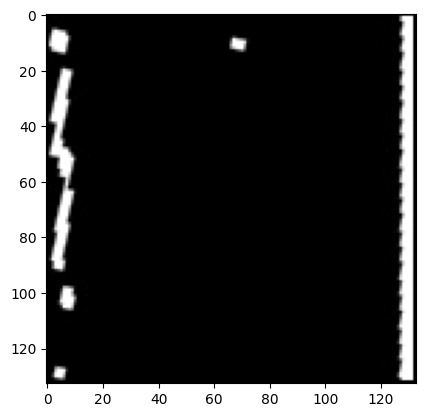

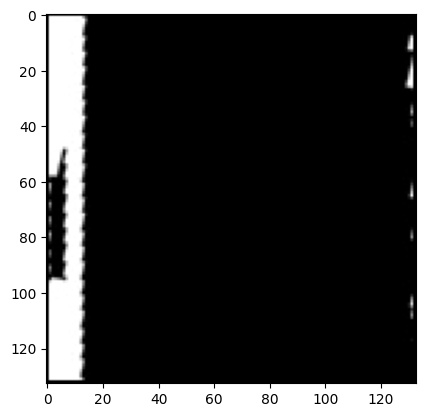

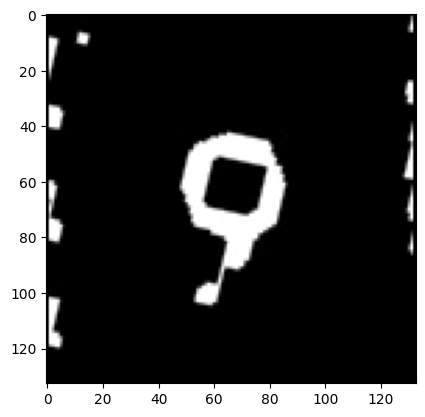

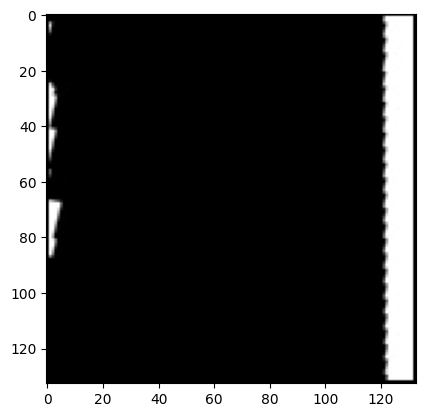

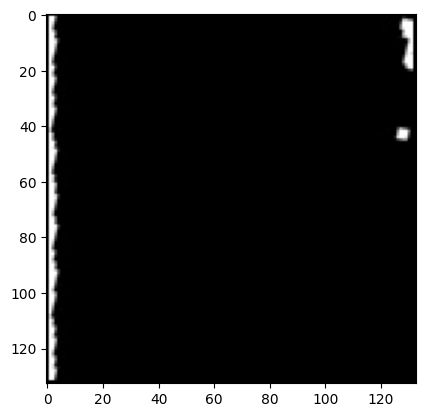

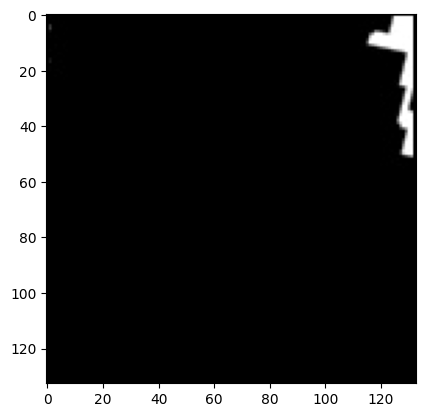

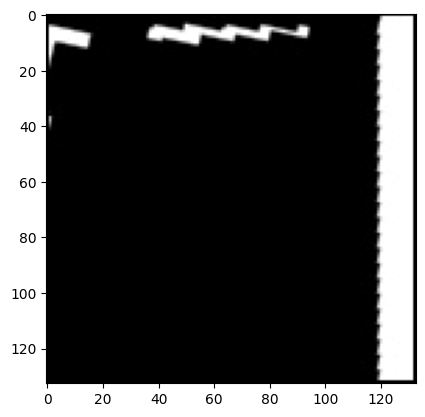

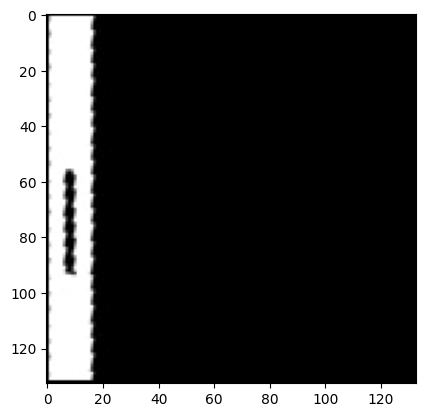

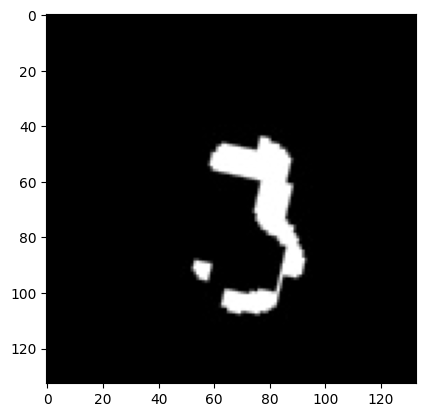

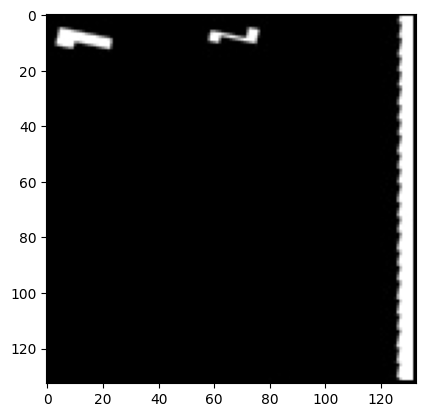

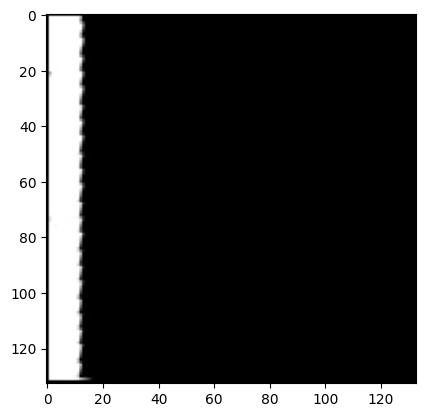

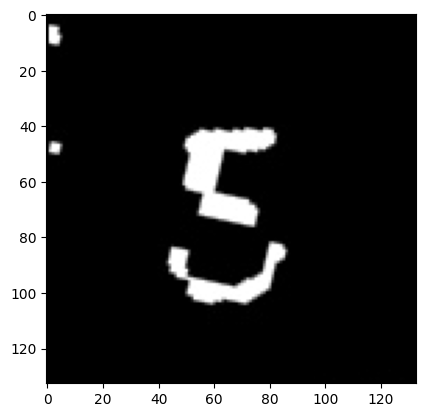

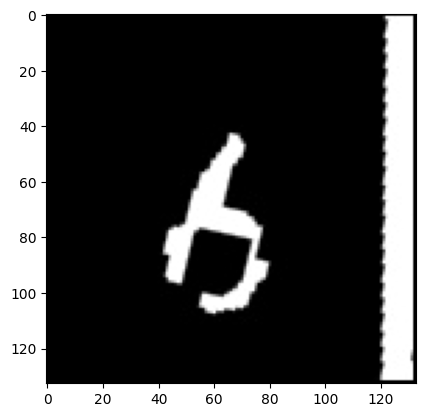

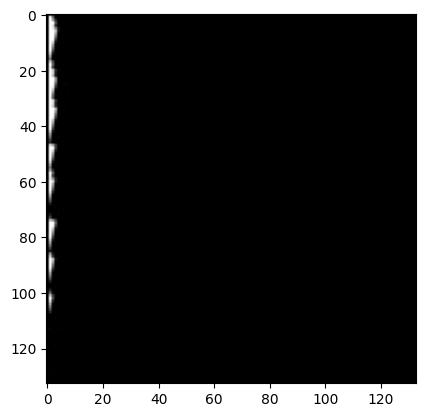

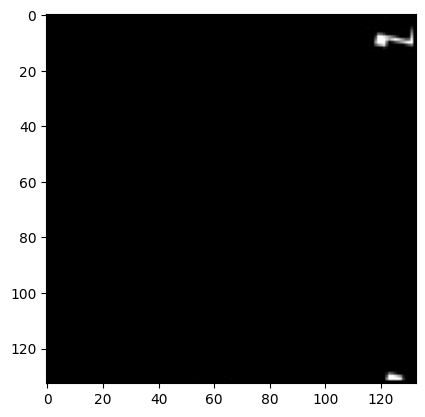

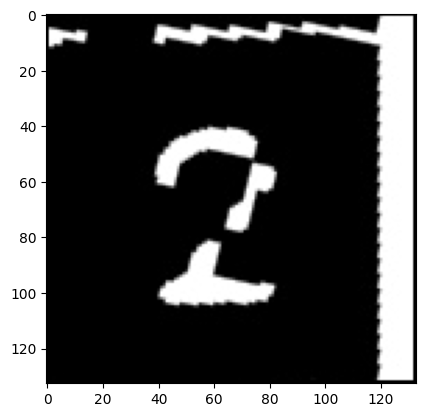

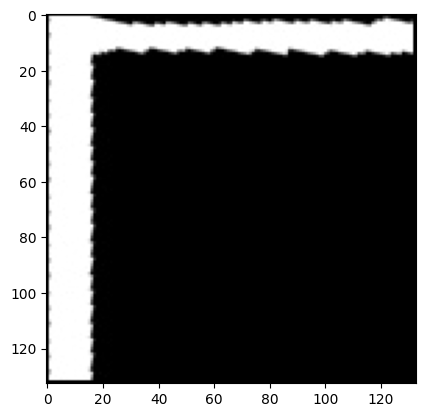

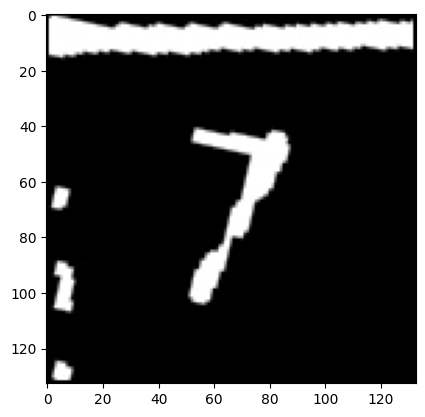

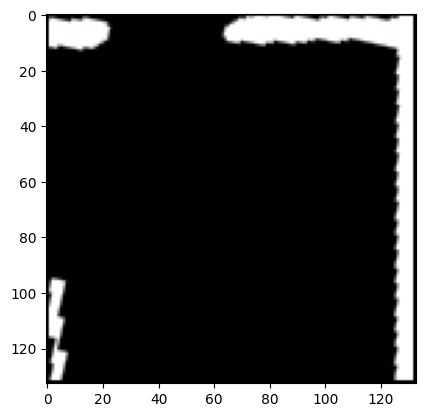

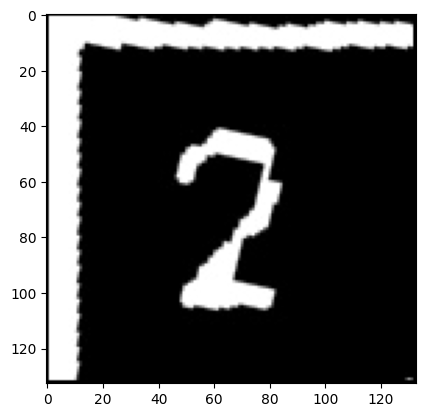

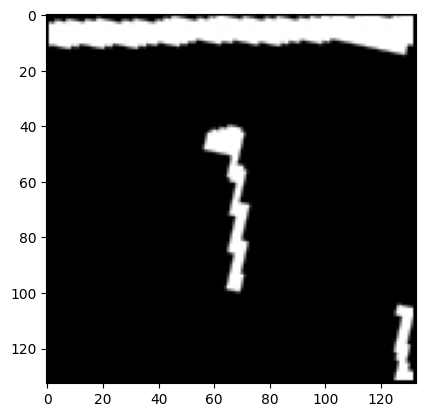

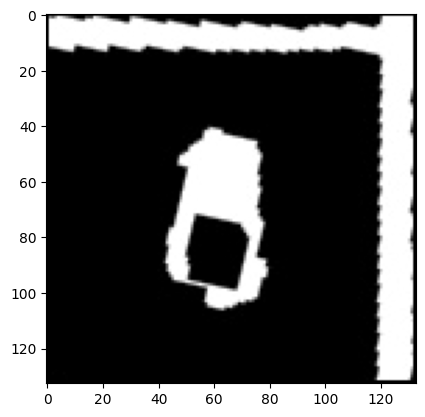

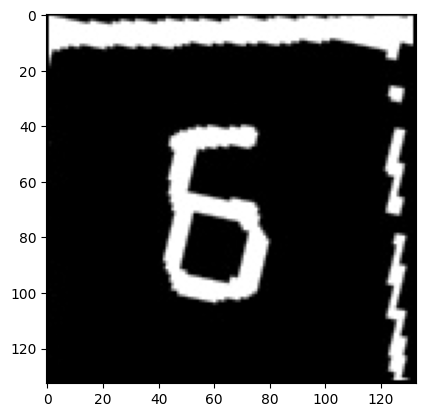

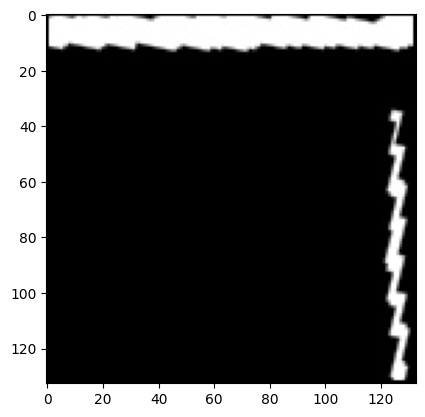

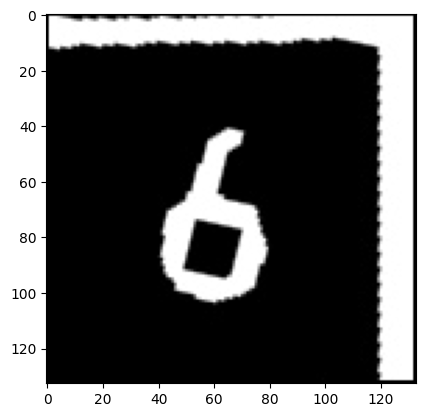

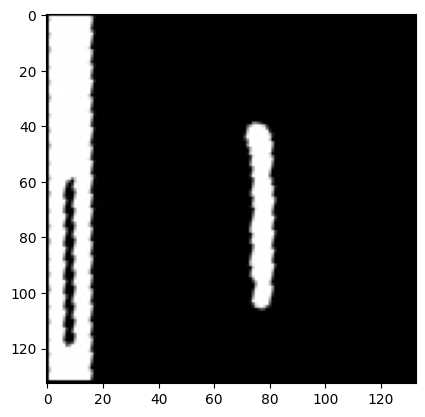

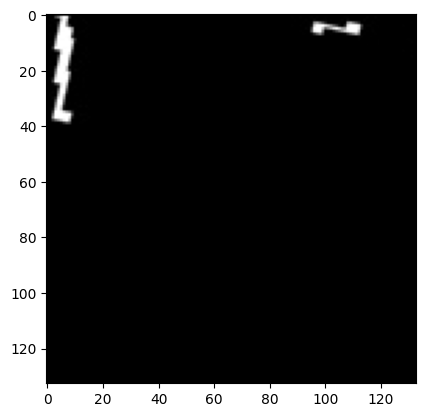

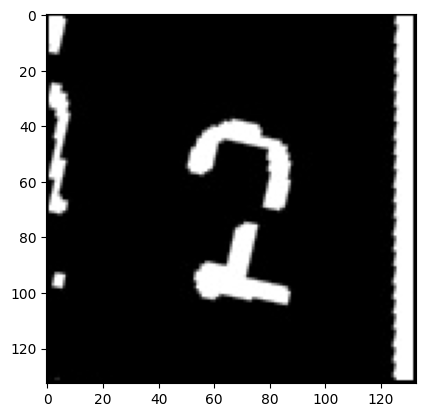

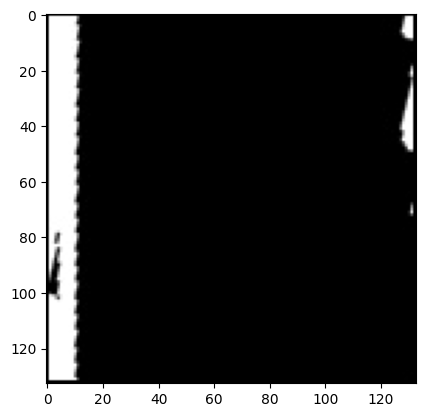

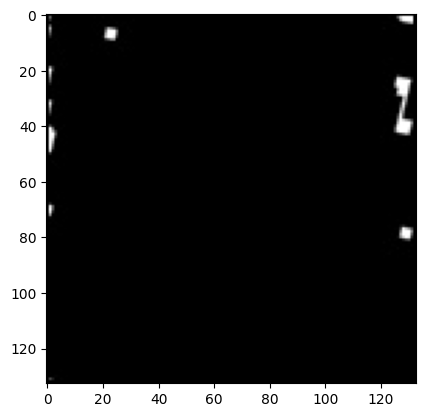

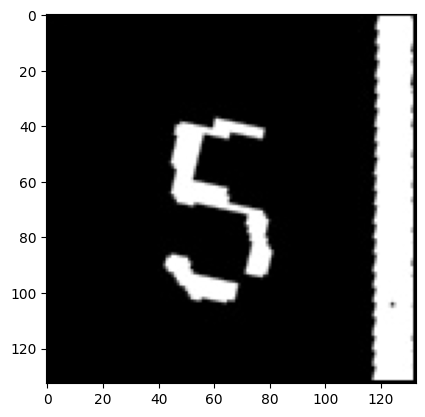

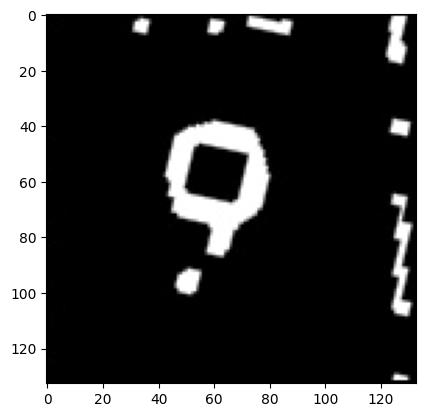

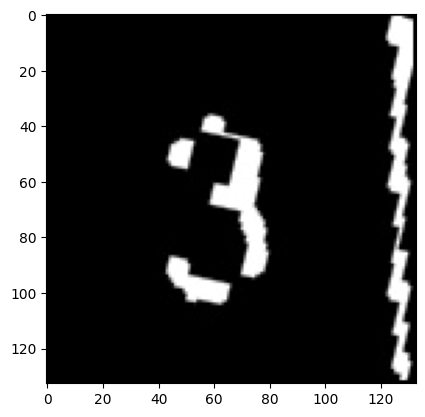

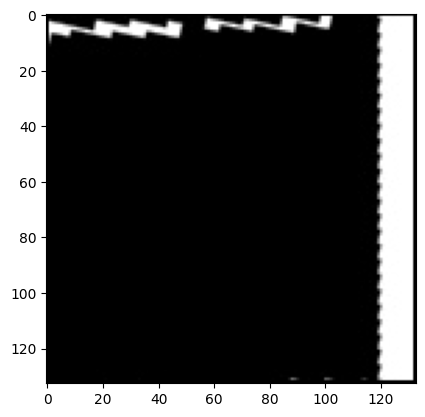

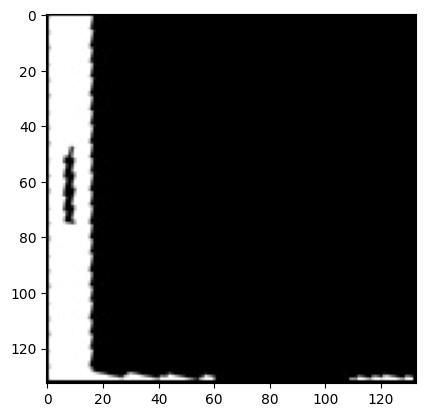

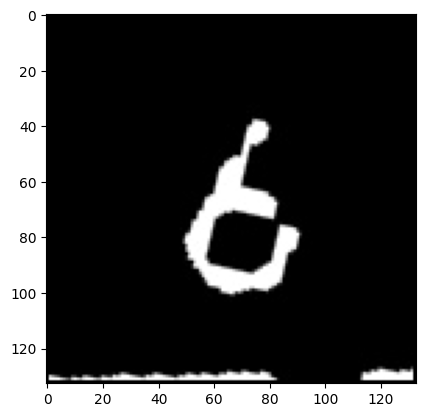

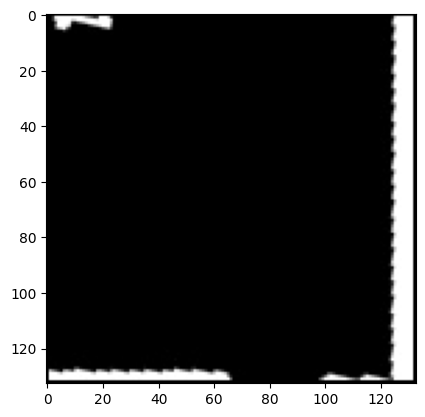

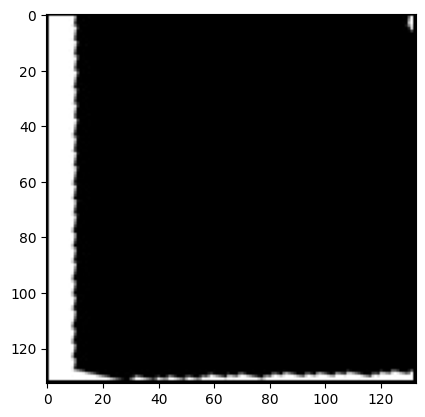

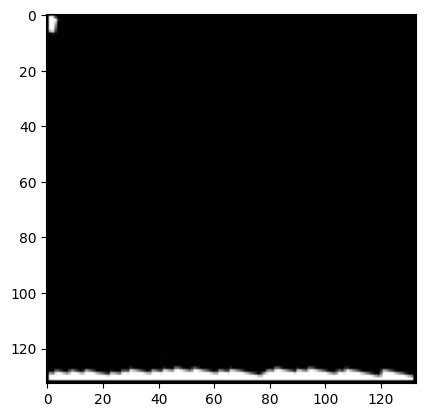

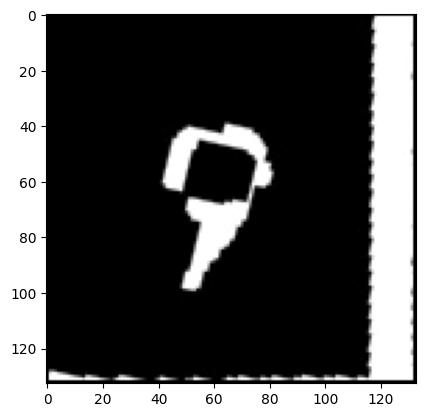

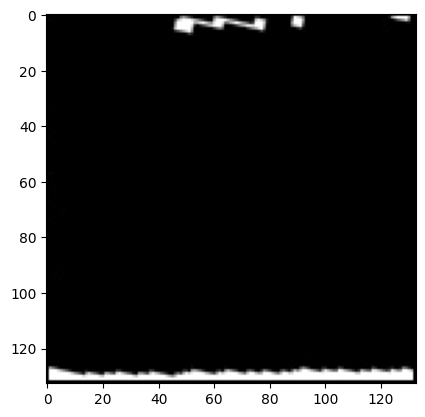

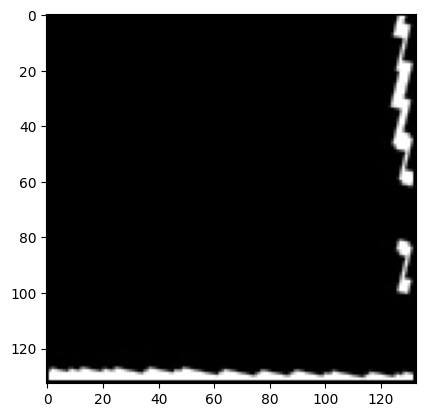

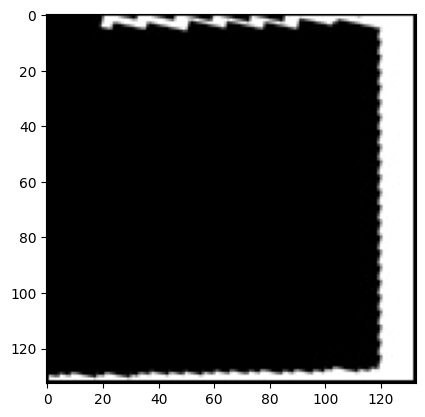

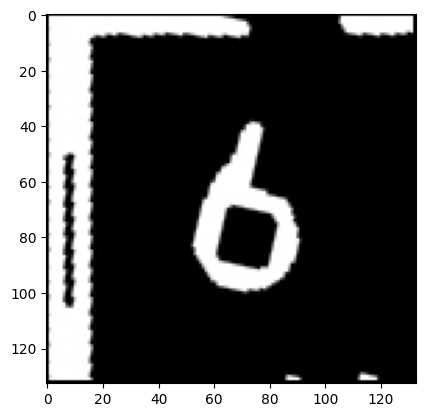

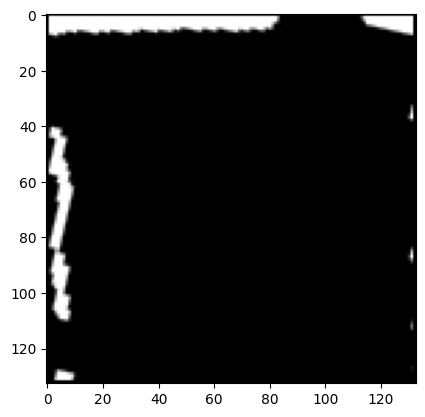

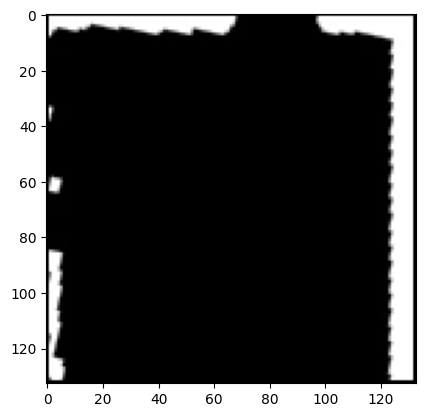

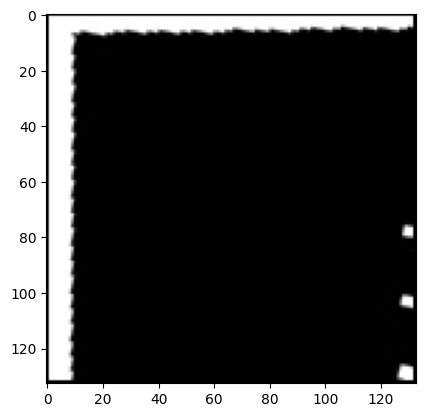

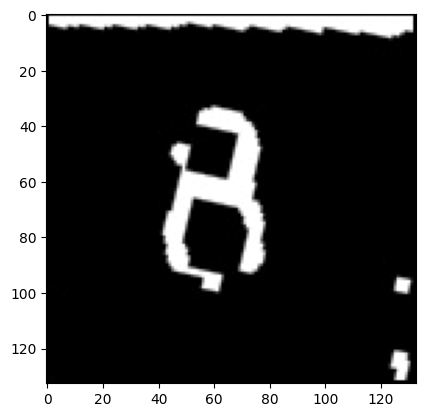

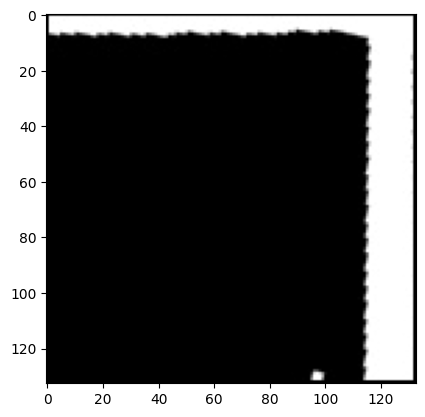

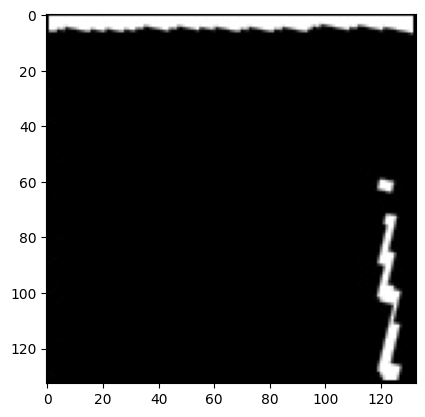

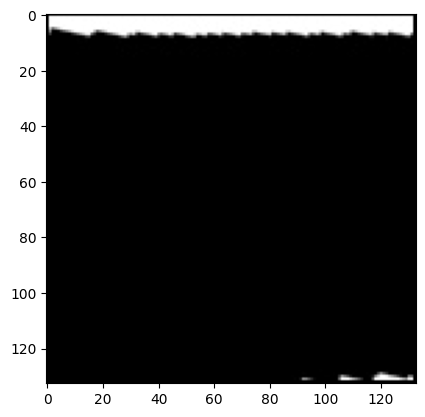

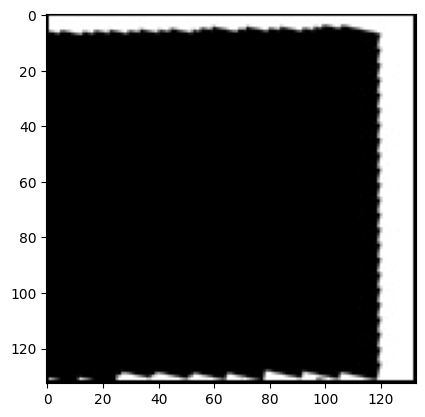

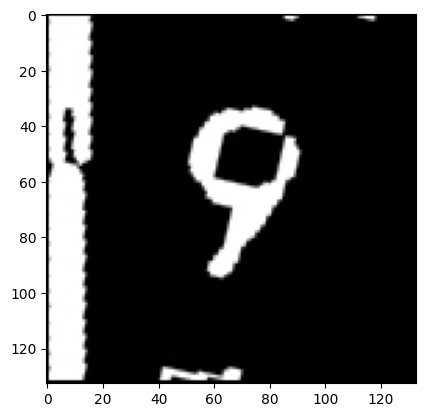

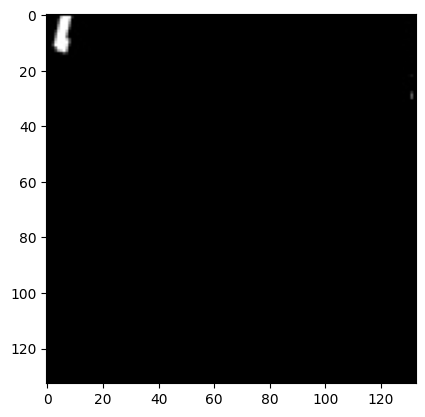

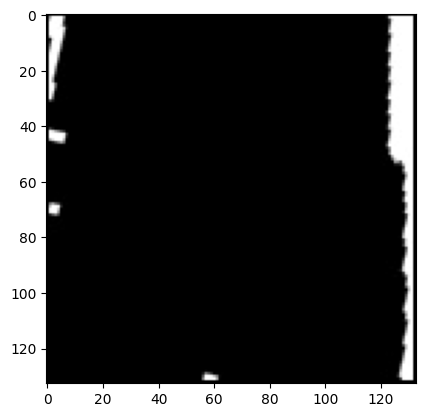

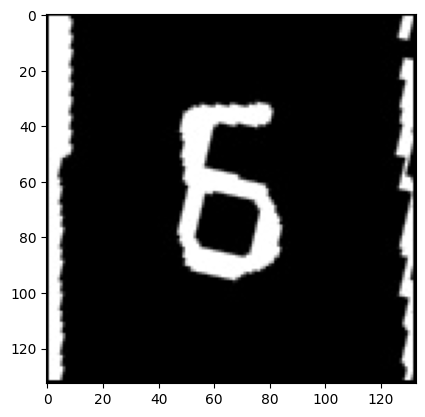

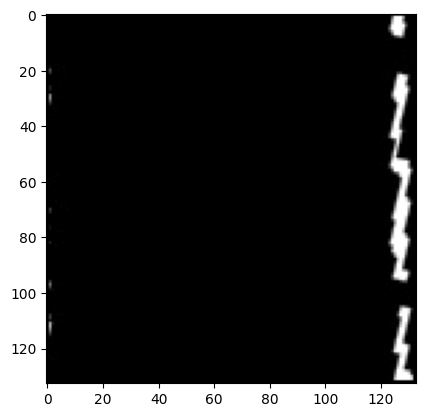

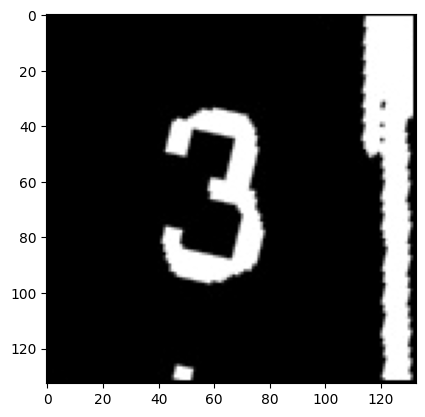

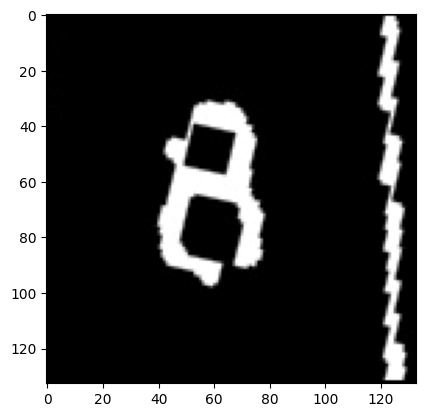

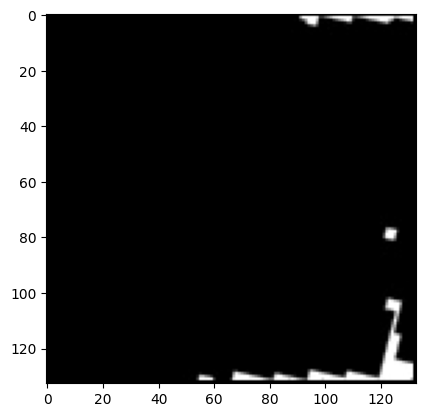

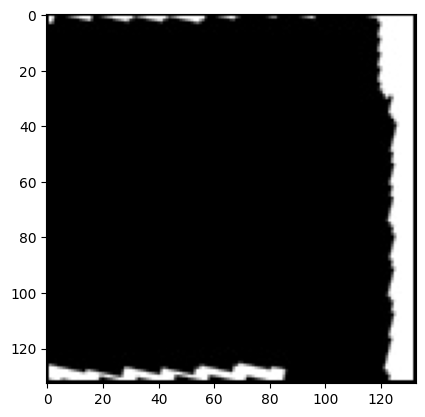

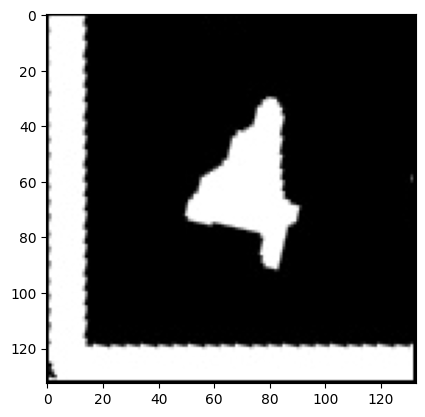

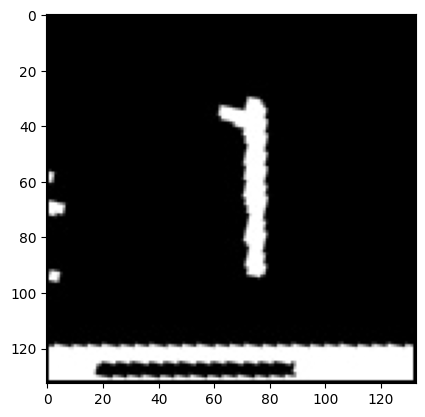

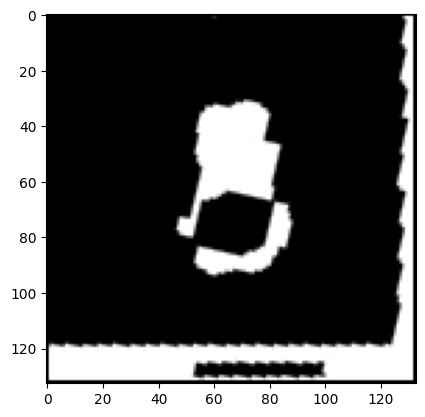

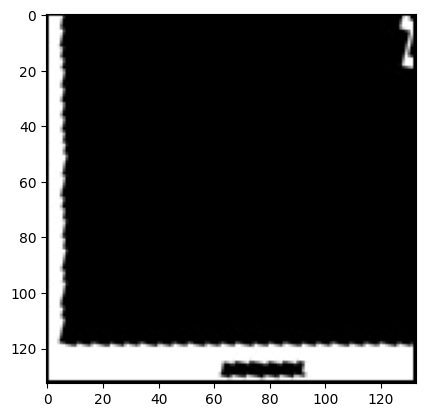

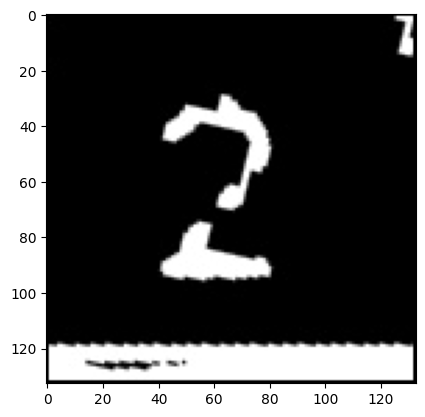

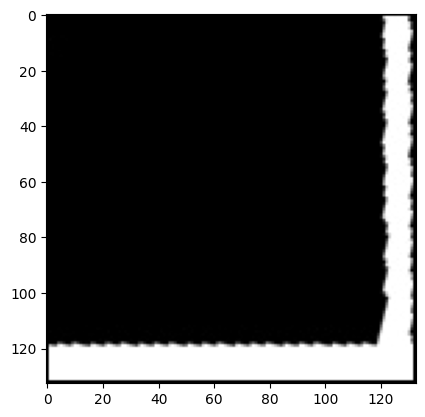

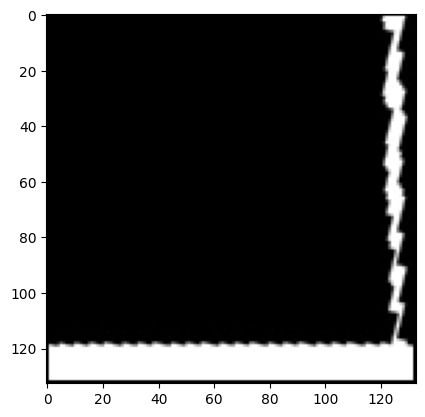

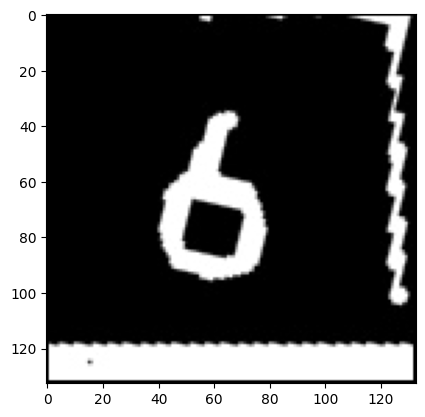

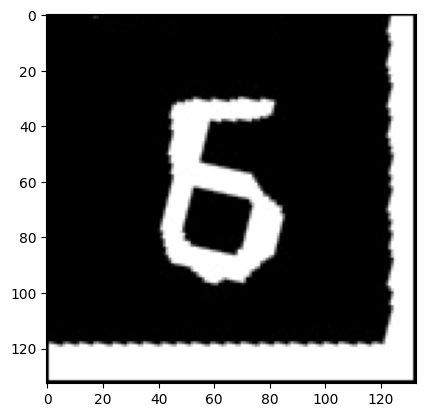

In [186]:
ROWS = 9
COLS = 9

# Define an empty 2D list to store the boxes
sudoku_boxes = []

# Iterate through each box and load it into the 2D array
for i in range(ROWS):
    row_boxes = []
    for j in range(COLS):
        # Load the box image
        box_folder = f'phase1_digits/font_2/test_16/tile_{i}_{j}.jpg'
        box_image = cv2.imread(box_folder, 0)
        #box_image = remove_border_connected(box_image)
        box_image = make_border_black(box_image)  
        #box_image = find_and_draw_longest_lines(box_image)
        box_image = find_and_remove_longest_lines_hough(box_image)
        plt.imshow(box_image, cmap ='gray')
        plt.axis('on')  # Hide axes
        plt.show()      
        matches_count_sift = match_images_with_sift(box_image, processed_images)
        matches_count_orb = match_images_with_orb(box_image, processed_images)
        matches_sift = [len(matches) for matches in matches_count_sift]
        matches_orb = list(matches_count_orb)
        avg_sift = sum(matches_sift)/len(matches_sift)
        avg_orb = sum(matches_orb)/len(matches_orb)
        if avg_sift <= 1 and avg_orb <= 1:
            max_index = -1
        else:
            indices_sift = sorted(range(len(matches_sift)), key=lambda i: matches_sift[i], reverse=True)[:2]
            max_index = max(indices_sift, key=lambda i: matches_orb[i])
        row_boxes.append(max_index+1)

    sudoku_boxes.append(row_boxes)


In [187]:
sudoku_boxes

[[7, 0, 0, 0, 0, 1, 2, 0, 0],
 [1, 0, 0, 0, 6, 0, 0, 0, 0],
 [0, 1, 0, 0, 5, 6, 0, 0, 2],
 [0, 1, 0, 2, 1, 1, 9, 0, 9],
 [5, 0, 2, 0, 0, 9, 2, 3, 0],
 [0, 9, 0, 0, 0, 7, 0, 0, 0],
 [9, 0, 0, 0, 3, 0, 0, 0, 0],
 [9, 0, 0, 5, 0, 3, 1, 0, 0],
 [4, 0, 9, 0, 5, 0, 0, 9, 5]]